# Notebook 1


### Exploratory data analysis

In this notebook, we'll do some exploratory data analysis over our dataset. However, since we don't have our features created yet, we cannot do a detailed exploration yet. The main goal of this exploration is to:

1. Get acquainted with our data set(size of dataset,column names and characteristics..etc)
2. Check if our dataset is imbalanced or if the labels a

In [1]:
#pip install wordcloud

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
#alt.renderers.enable("notebook")
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud  ##It is used to plot the frequency of the words which determines their size

#improve plotting resolution
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

#display complete non-truncated text data
pd.set_option('display.max_colwidth', None)

In [16]:
df= pd.read_pickle("data/features.pkl")
df.head(2)

,original_text,label,preprocessed,word_count,avg_word_count,syllable_count,uncommon,difficult_words,stem,discourse,cohesive_features,flesch,dale,mcalpine,nouns_adjs,normalized
0,"There is manuscript evidence that Austen continued to work on these pieces as late as the period 1809 â '' 11 , and that her niece and nephew , Anna and James Edward Austen , made further additions as late as 1814 .",1,"[there, is, manuscript, evidence, that, austen, continued, to, work, on, these, pieces, as, late, as, the, period, â, and, that, her, niece, and, nephew, anna, and, james, edward, austen, made, further, additions, as, late, as]",35,4.485714,1.371429,14,7,there is manuscript evid that austen continu to work on these piec as late as the period â and that her niec and nephew anna and jame edward austen made further addit as late as,4,2,52.87,11.24,48.0,0.228571,there is manuscript evidence that austen continued to work on these pieces as late as the period â and that her niece and nephew anna and james edward austen made further additions as late as
1,"In a remarkable comparative analysis , Mandaean scholar Säve-Söderberg demonstrated that Mani 's Psalms of Thomas were closely related to Mandaean texts .",1,"[in, a, remarkable, comparative, analysis, mandaean, scholar, demonstrated, that, mani, psalms, of, thomas, were, closely, related, to, mandaean, texts]",19,6.000000,1.789474,14,8,there is manuscript evid that austen continu to work on these piec as late as the period â and that her niec and nephew anna and jame edward austen made further addit as late as,2,1,35.27,14.55,23.0,0.315789,in a remarkable comparative analysis mandaean scholar demonstrated that mani psalms of thomas were closely related to mandaean texts


In [4]:
#checking if we have an imbalanced data set
pos_length= len(df[df['label']==1])
neg_length= len(df[df['label']==0])

print("There are {} documents in the positive class".format(pos_length))
print("There are {} documents in the negative class".format(neg_length))
print("The ratio of positive to negative class is {}:{}".\
      format(int(pos_length/neg_length),int(pos_length/neg_length)))

There are 206340 documents in the positive class
There are 197268 documents in the negative class
The ratio of positive to negative class is 1:1


Text(0.5, 1.0, 'document length distribution')

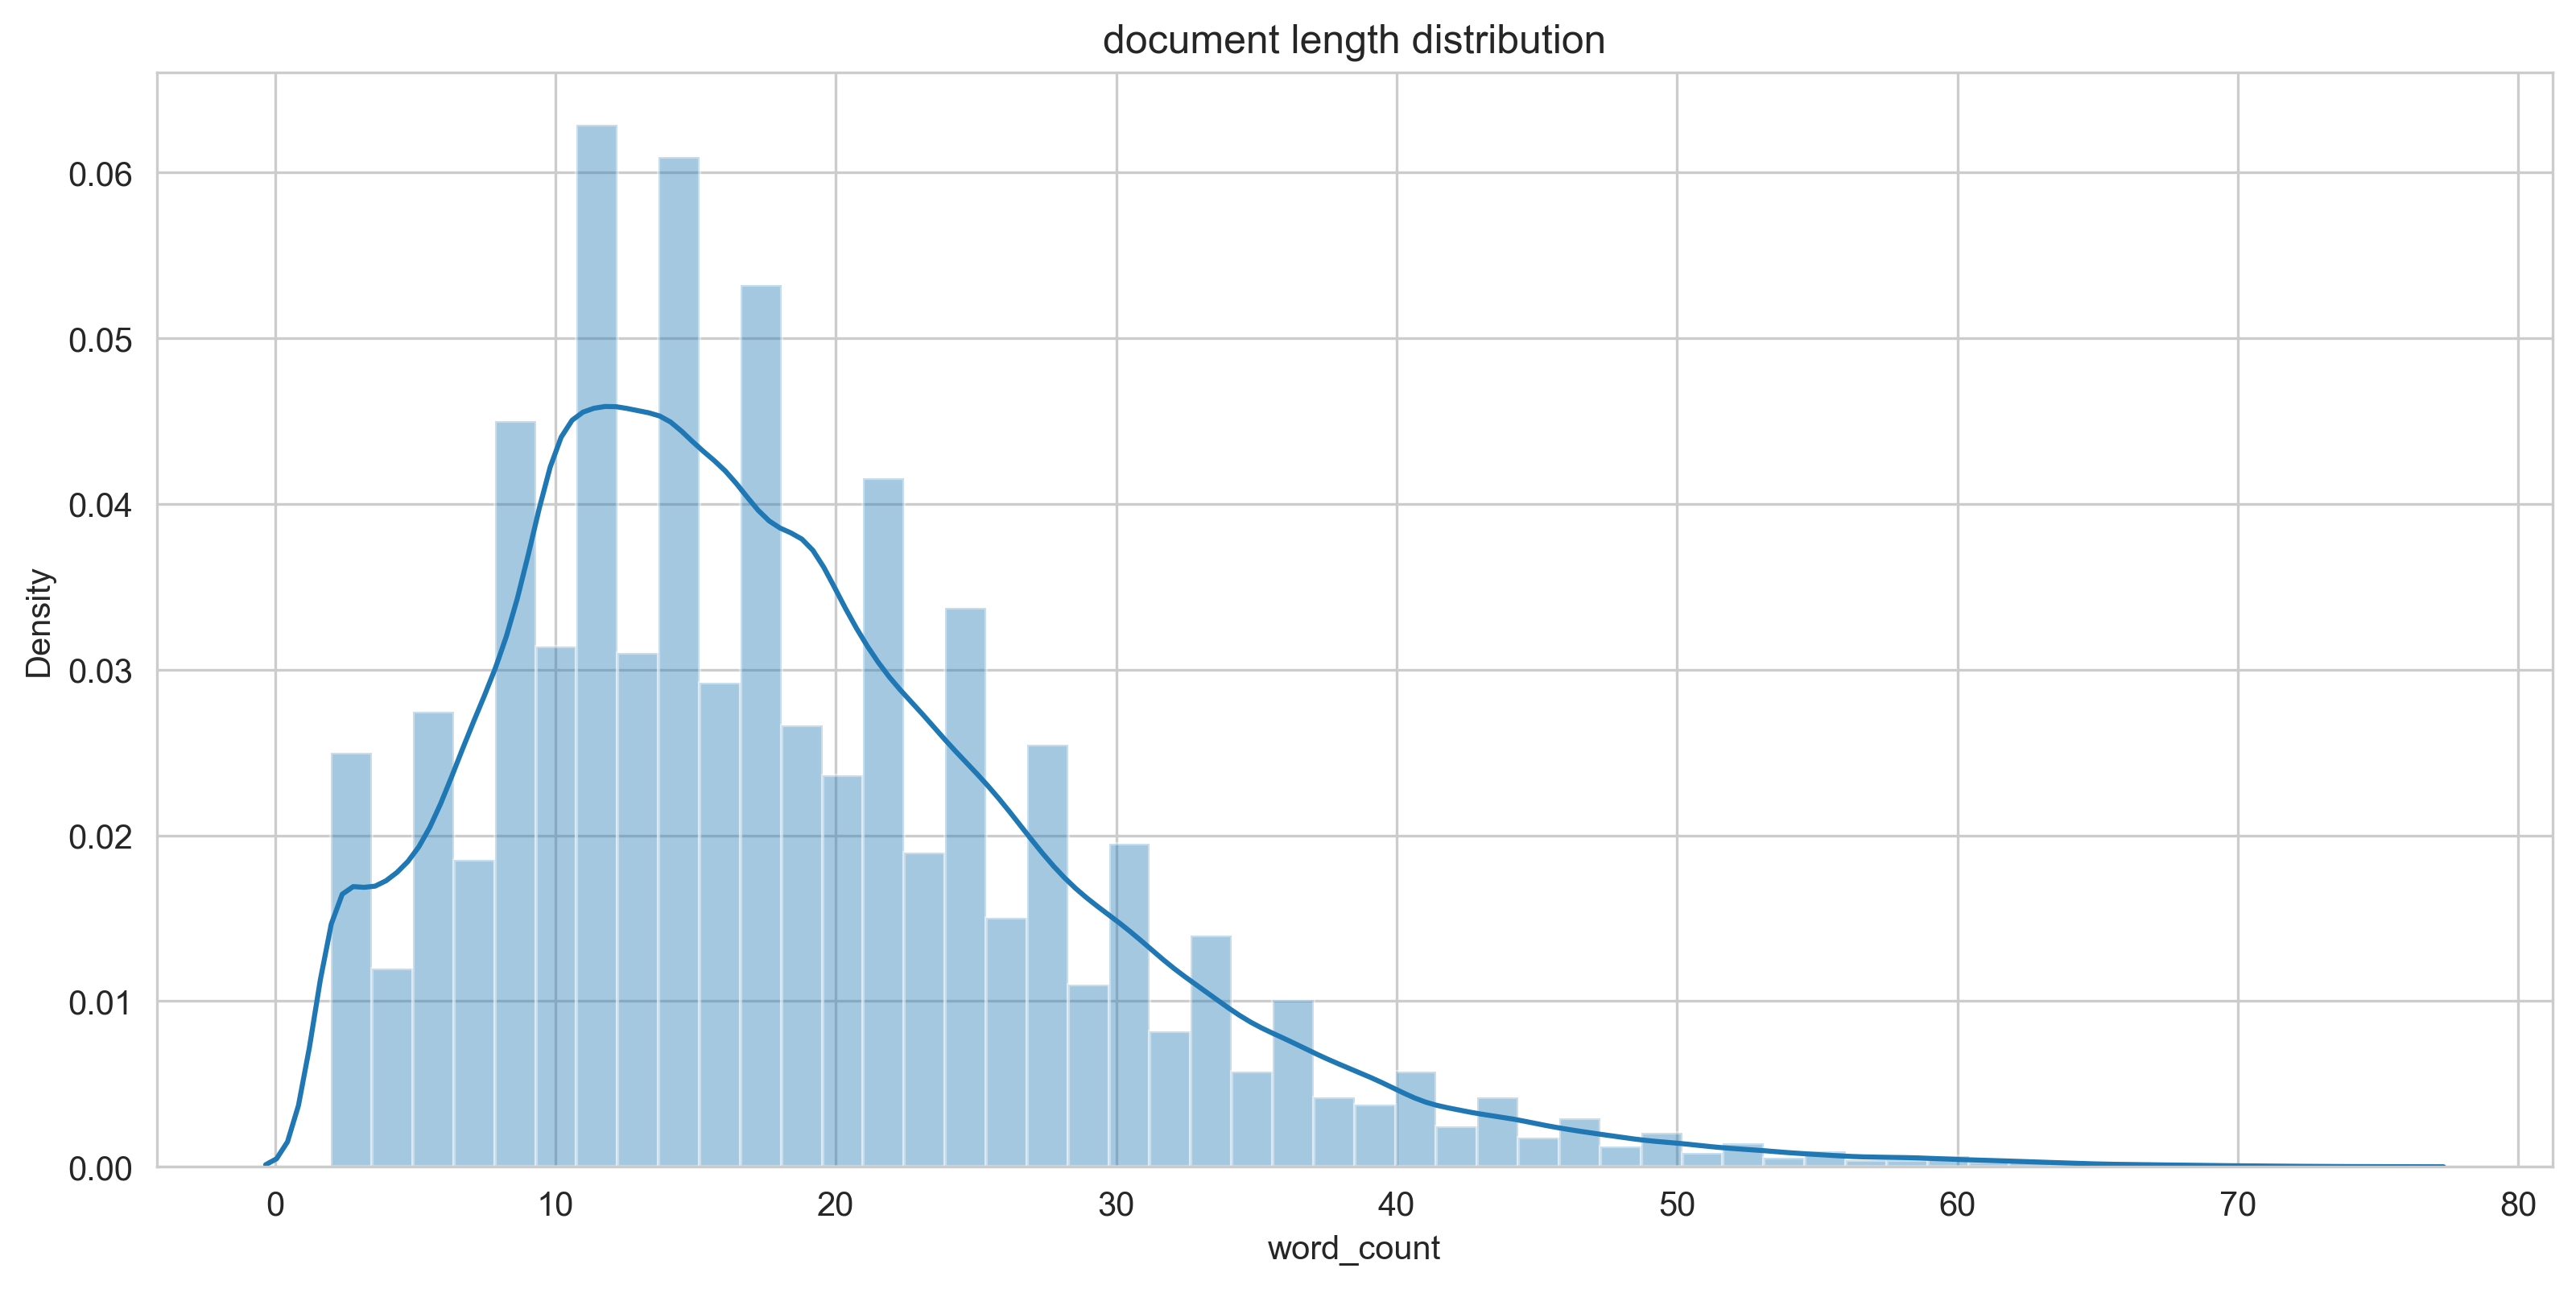

In [5]:
#Although there are special characters in the text (\r, \n), it will be useful as an approximation

plt.figure(figsize=(12.8,6))
sns.distplot(df['word_count']).set_title('document length distribution')

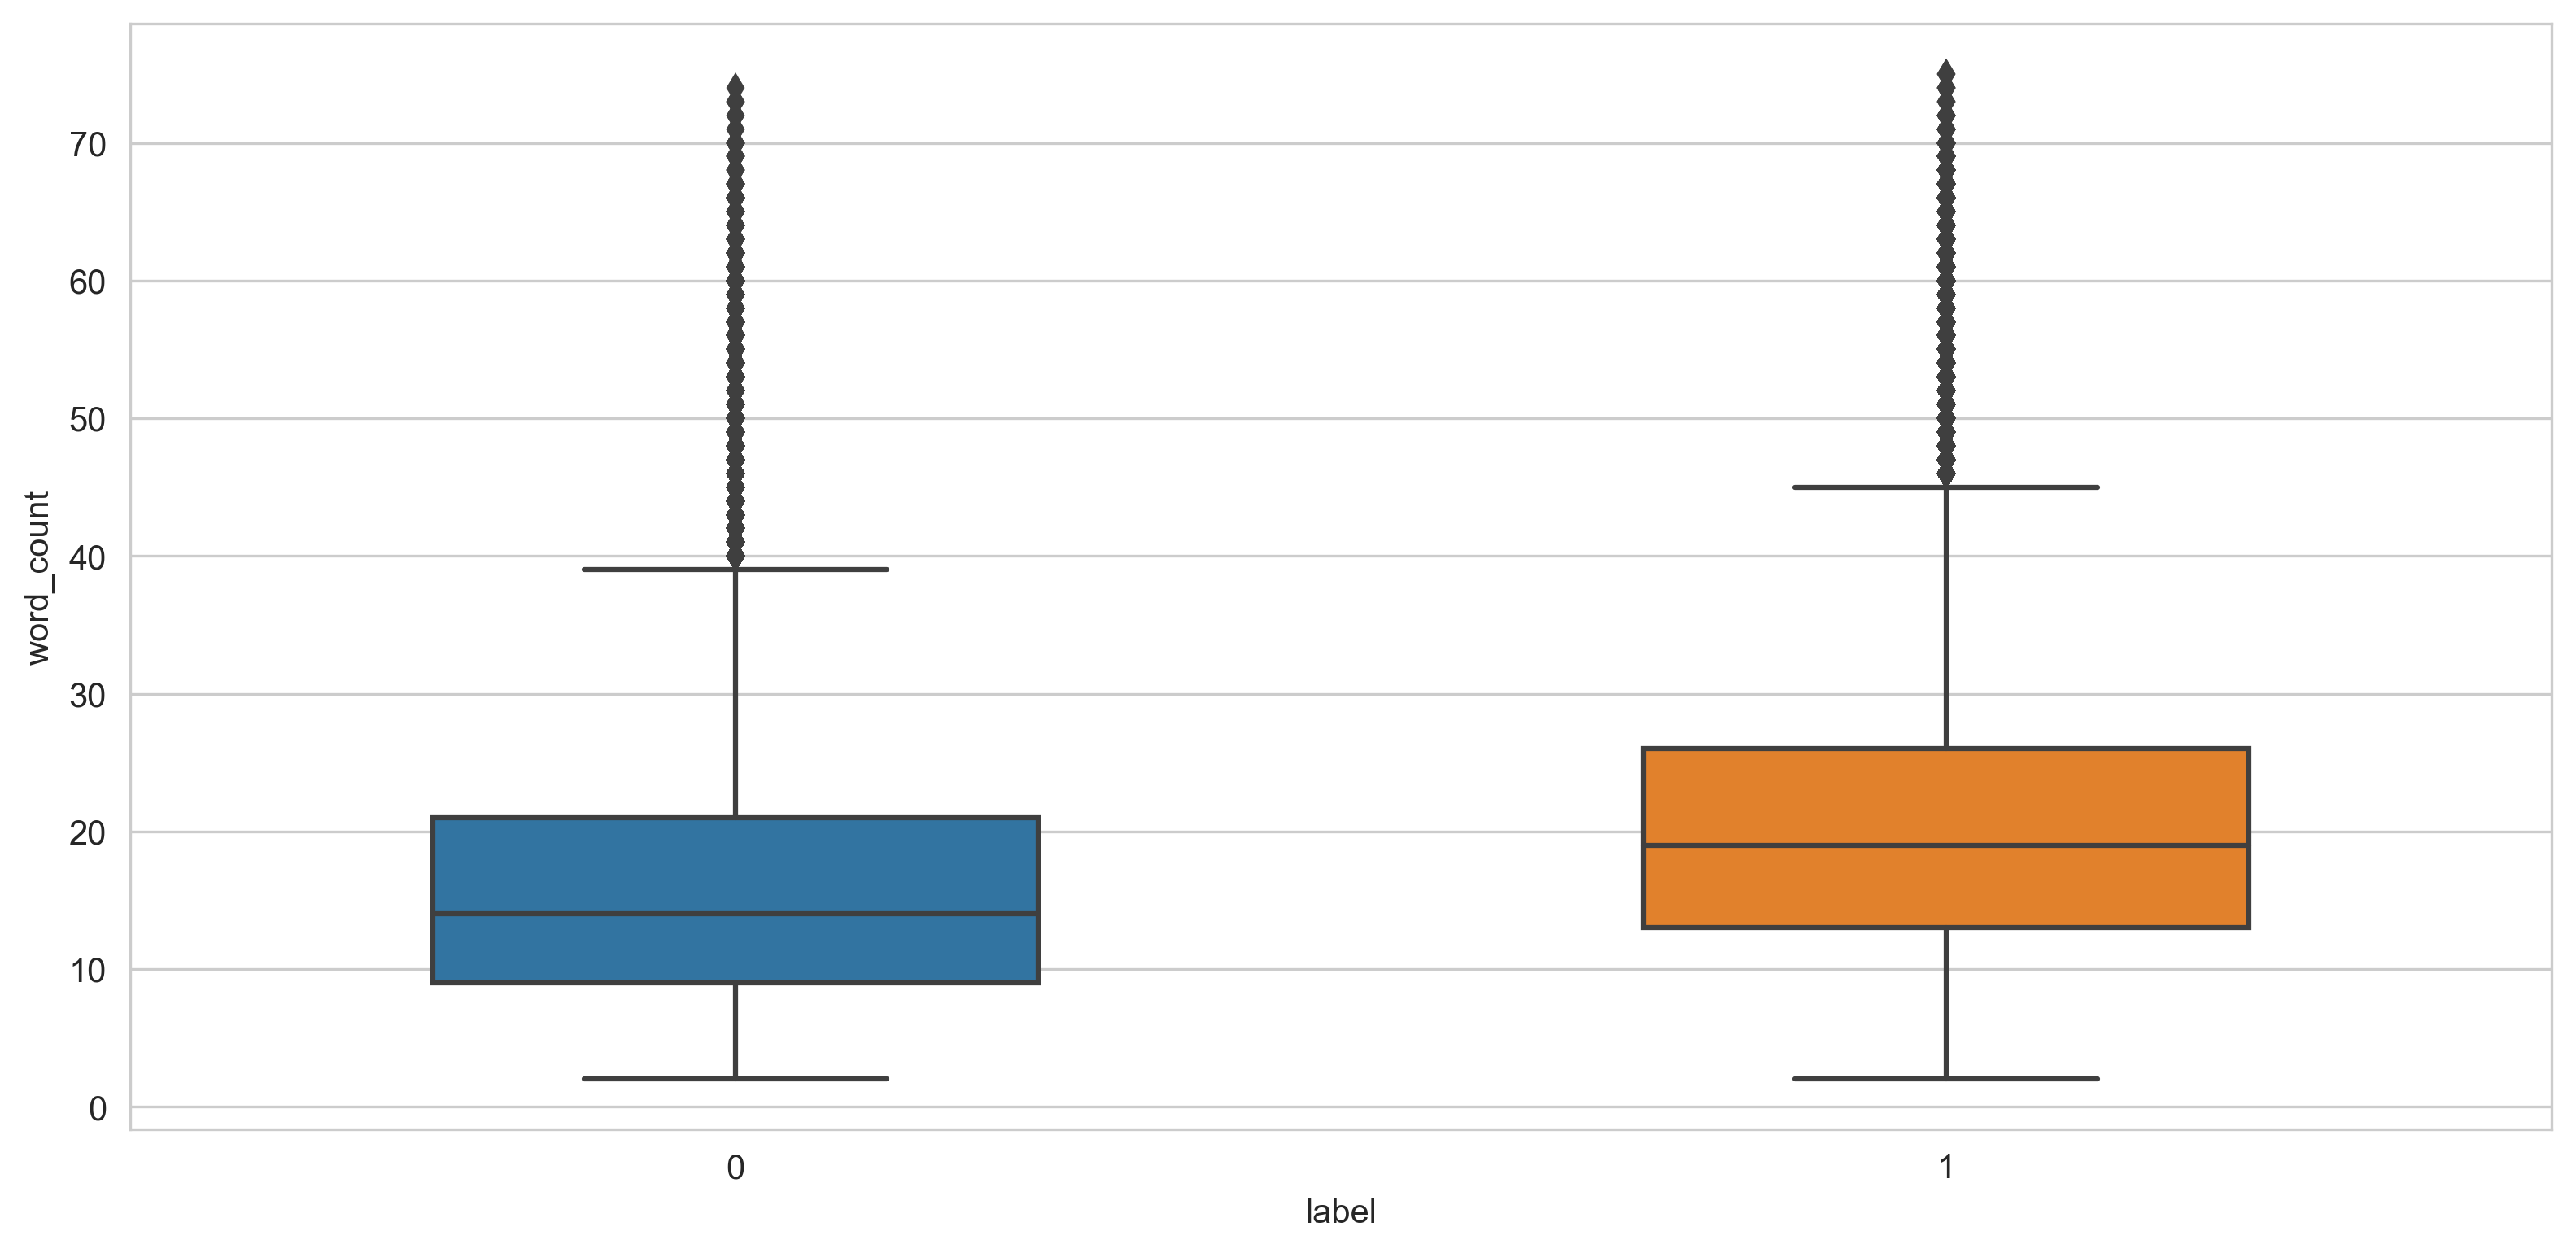

In [7]:
#let's examine the negative vs. positive labels. Are the "easy" documents longer or shorter 
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='label', y='word_count', width=.5);

Using the graph, we can compare the range and distribution of the document length for easy and hard documents. We observe that there is a greater variability for hard doc_length"

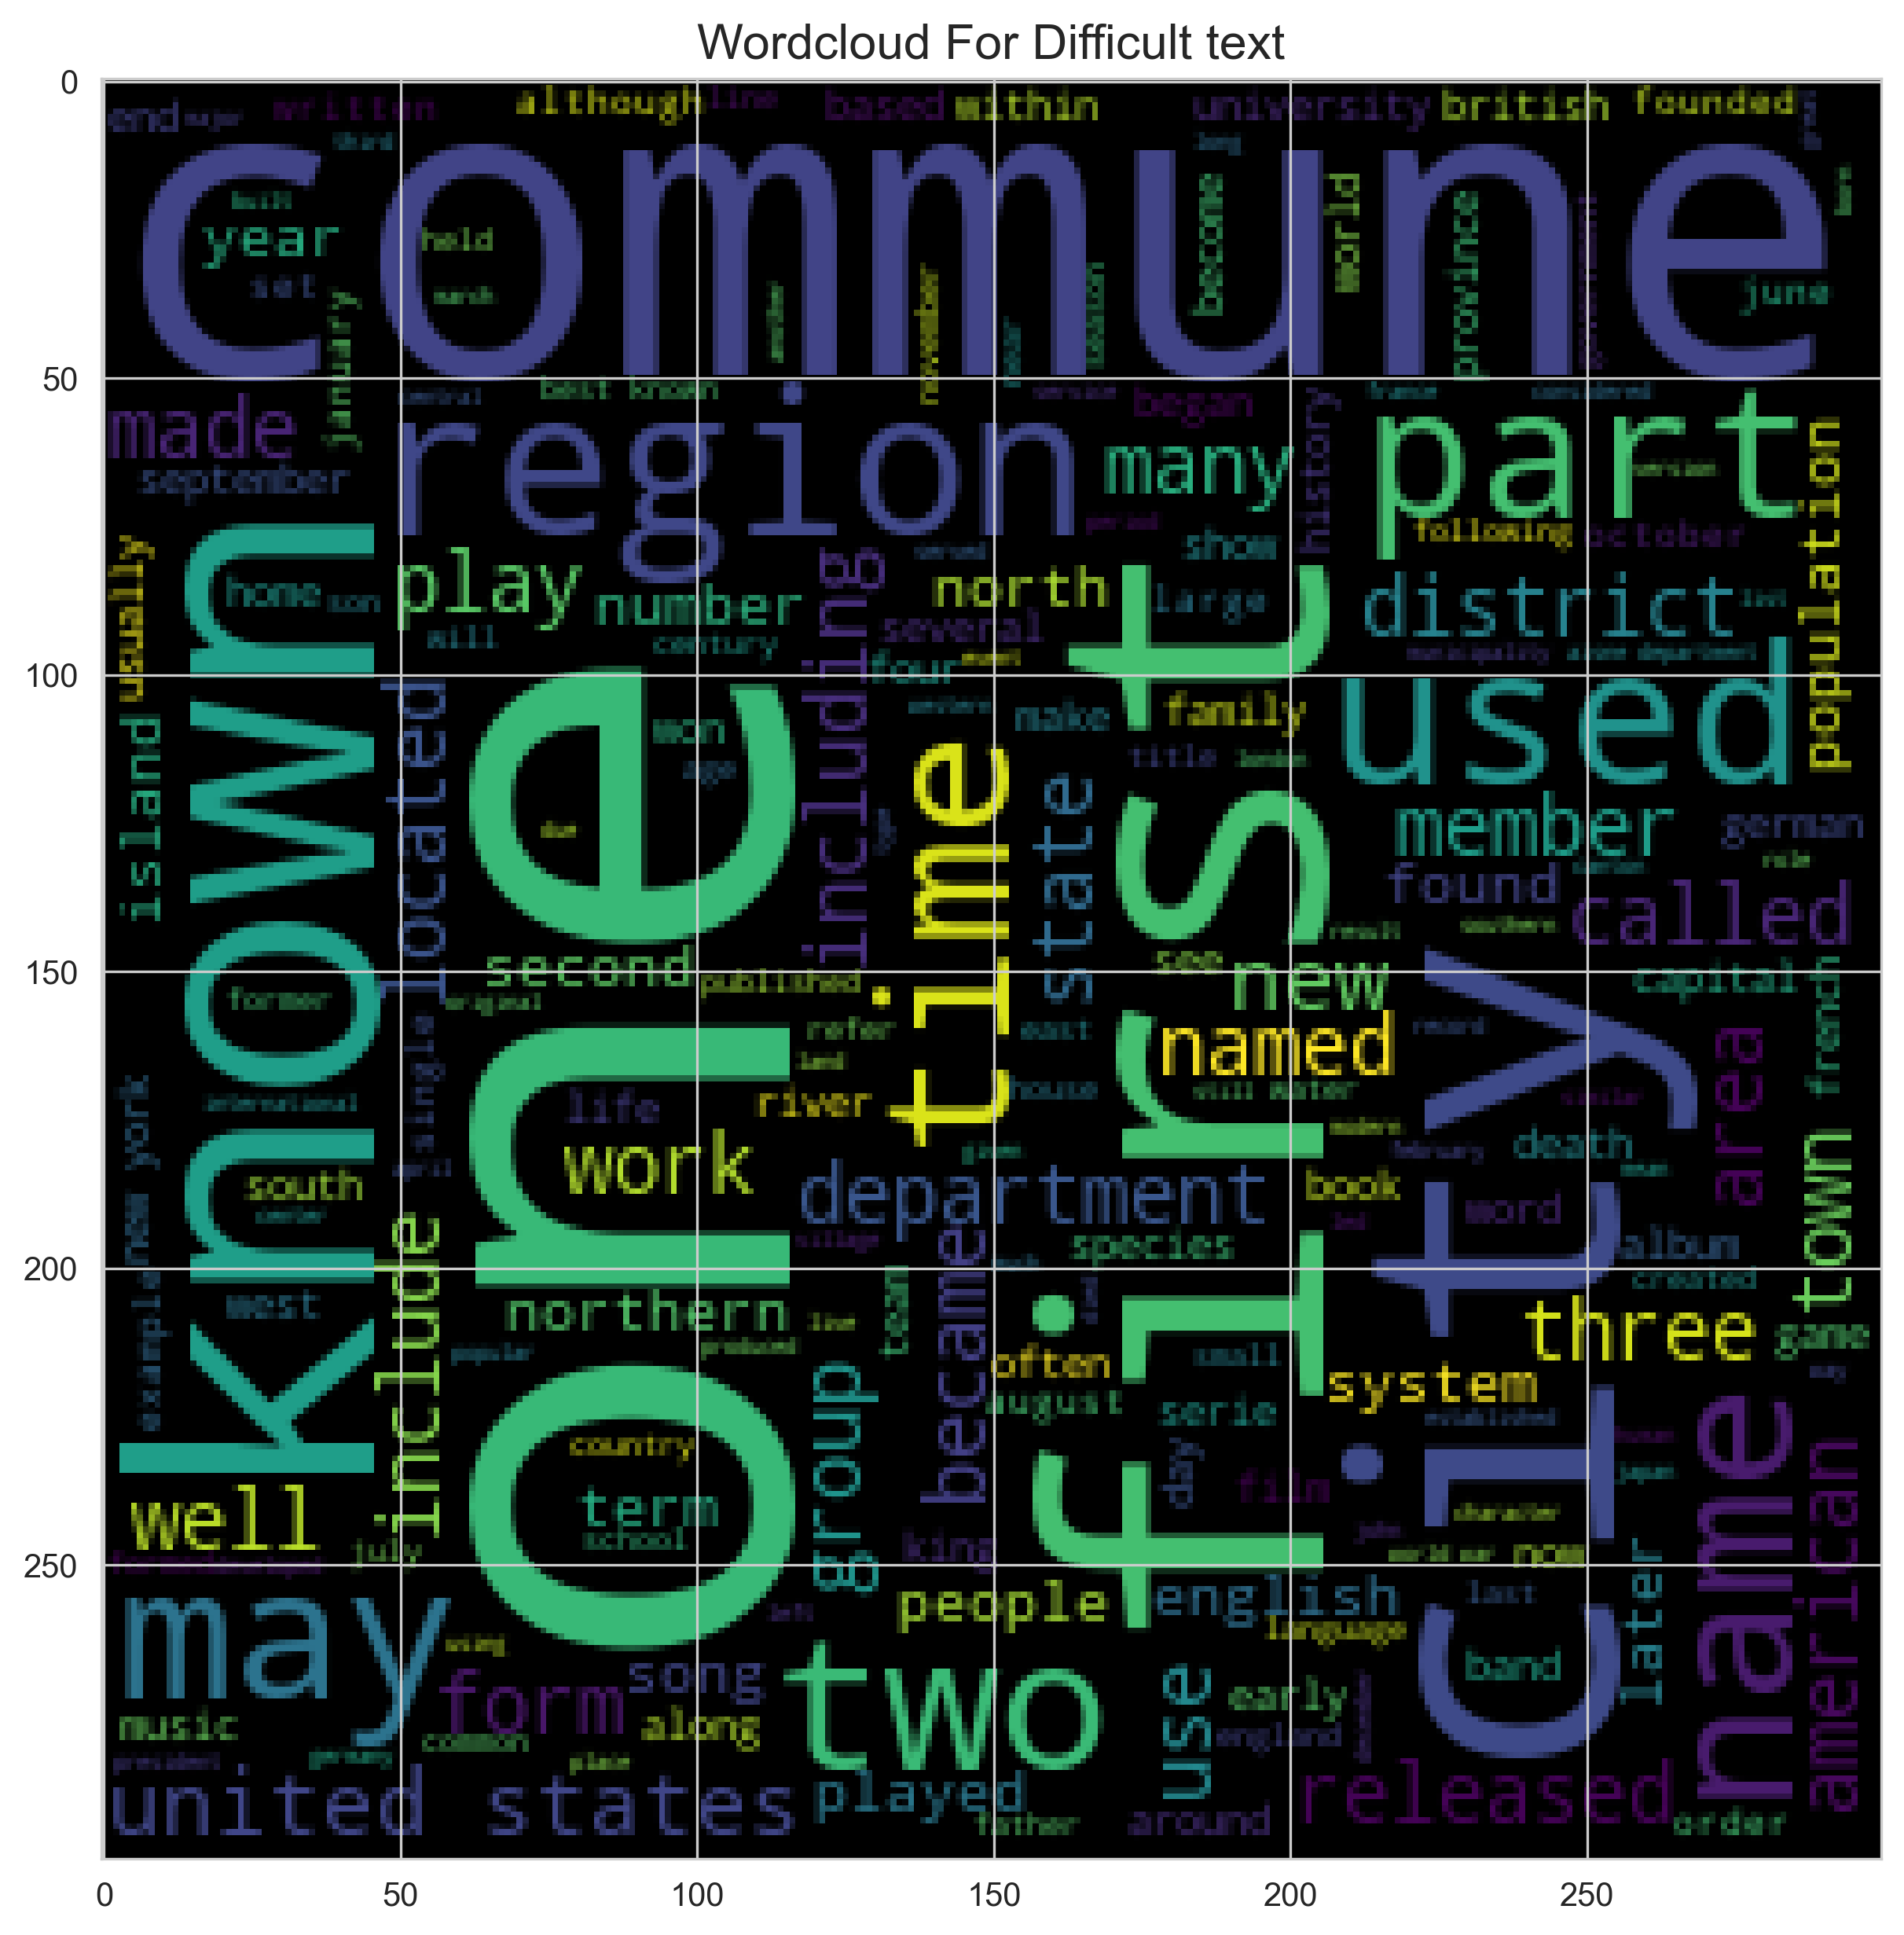

In [12]:
def wordcloud_function(df, title, column, label,fontsize = 15, 
                       figsize = (10, 10), width = 300, height = 300):
    """
    This function ensures that we get the size of the words based on their occurence 
    and we are going to use a figure to plot it in this function respectively. 
    """
    fdf = df[df['label']==label]
    total_text = ''.join([text for text in fdf[column]])
    wordcloud = WordCloud(width = width, height = height).generate(total_text)
    plt.figure(figsize = figsize)
    plt.imshow(wordcloud)
    plt.title(title, fontsize = fontsize)
    plt.show()

    
wordcloud_function(df, title = "Wordcloud For Difficult text", column = "normalized",label=1)

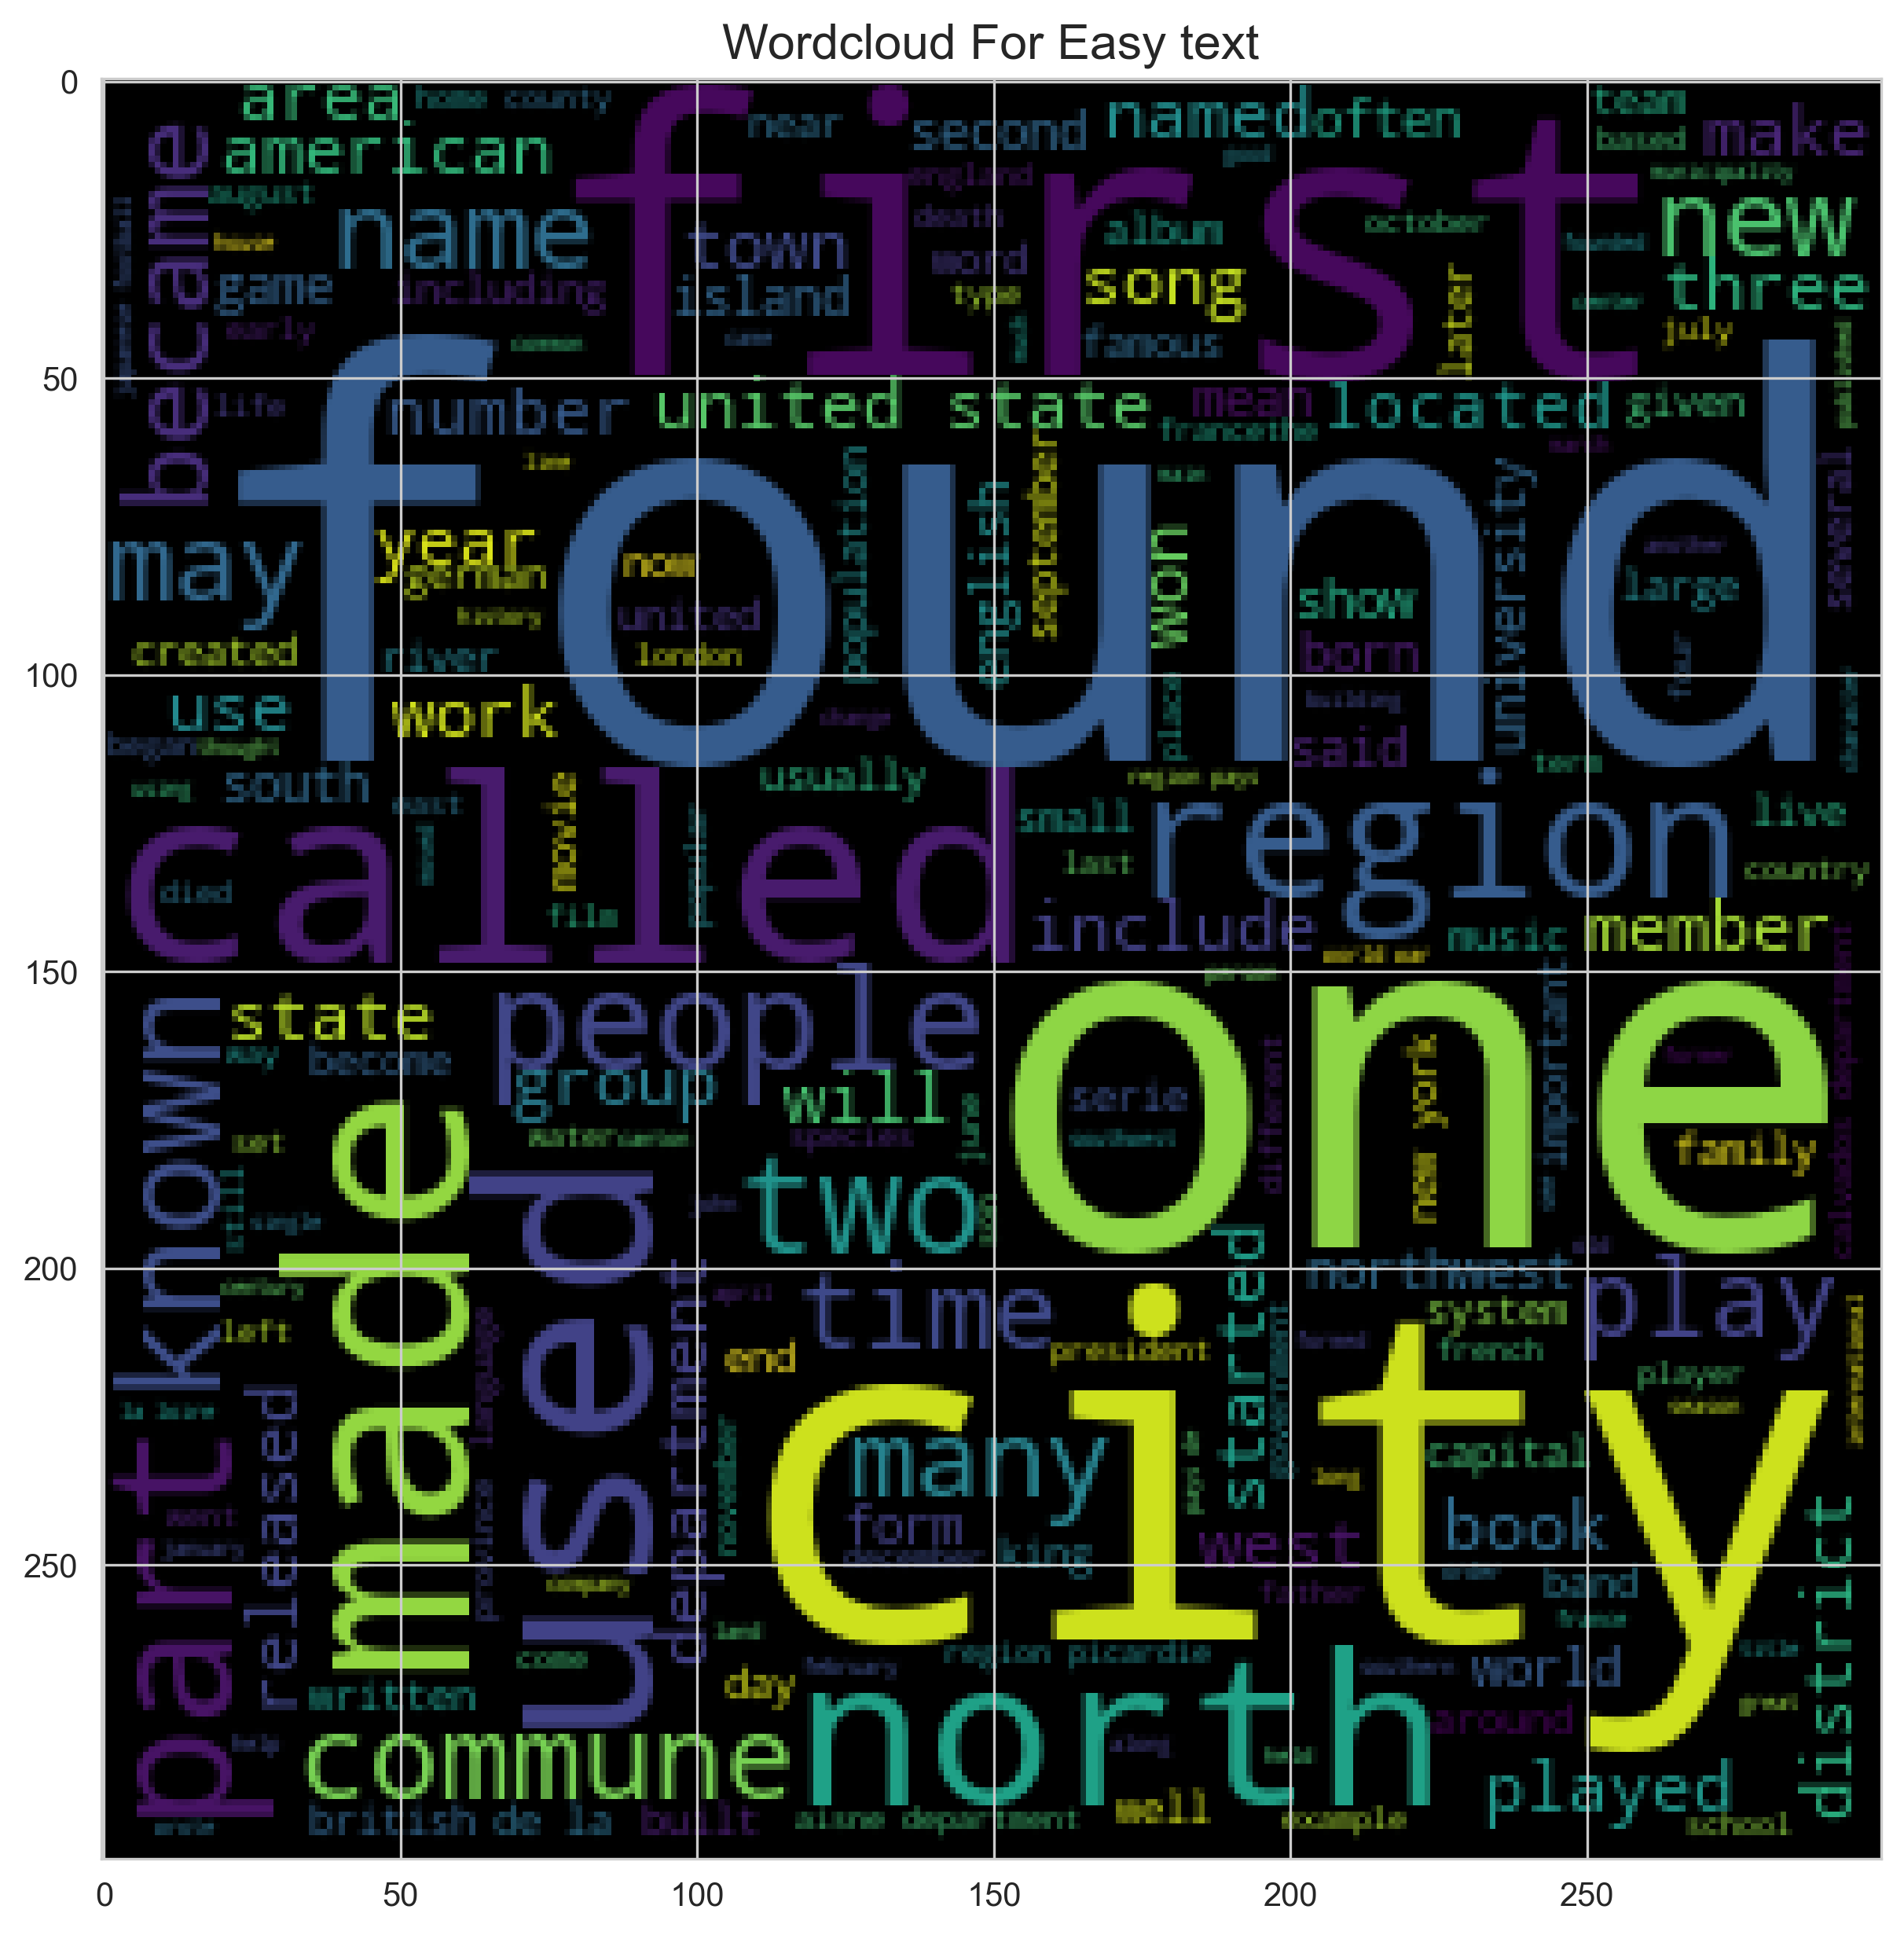

In [13]:
wordcloud_function(df, title = "Wordcloud For Easy text", column = "normalized",label=0)

Now, let's look at our features and see what correlations we might observe

<AxesSubplot:>

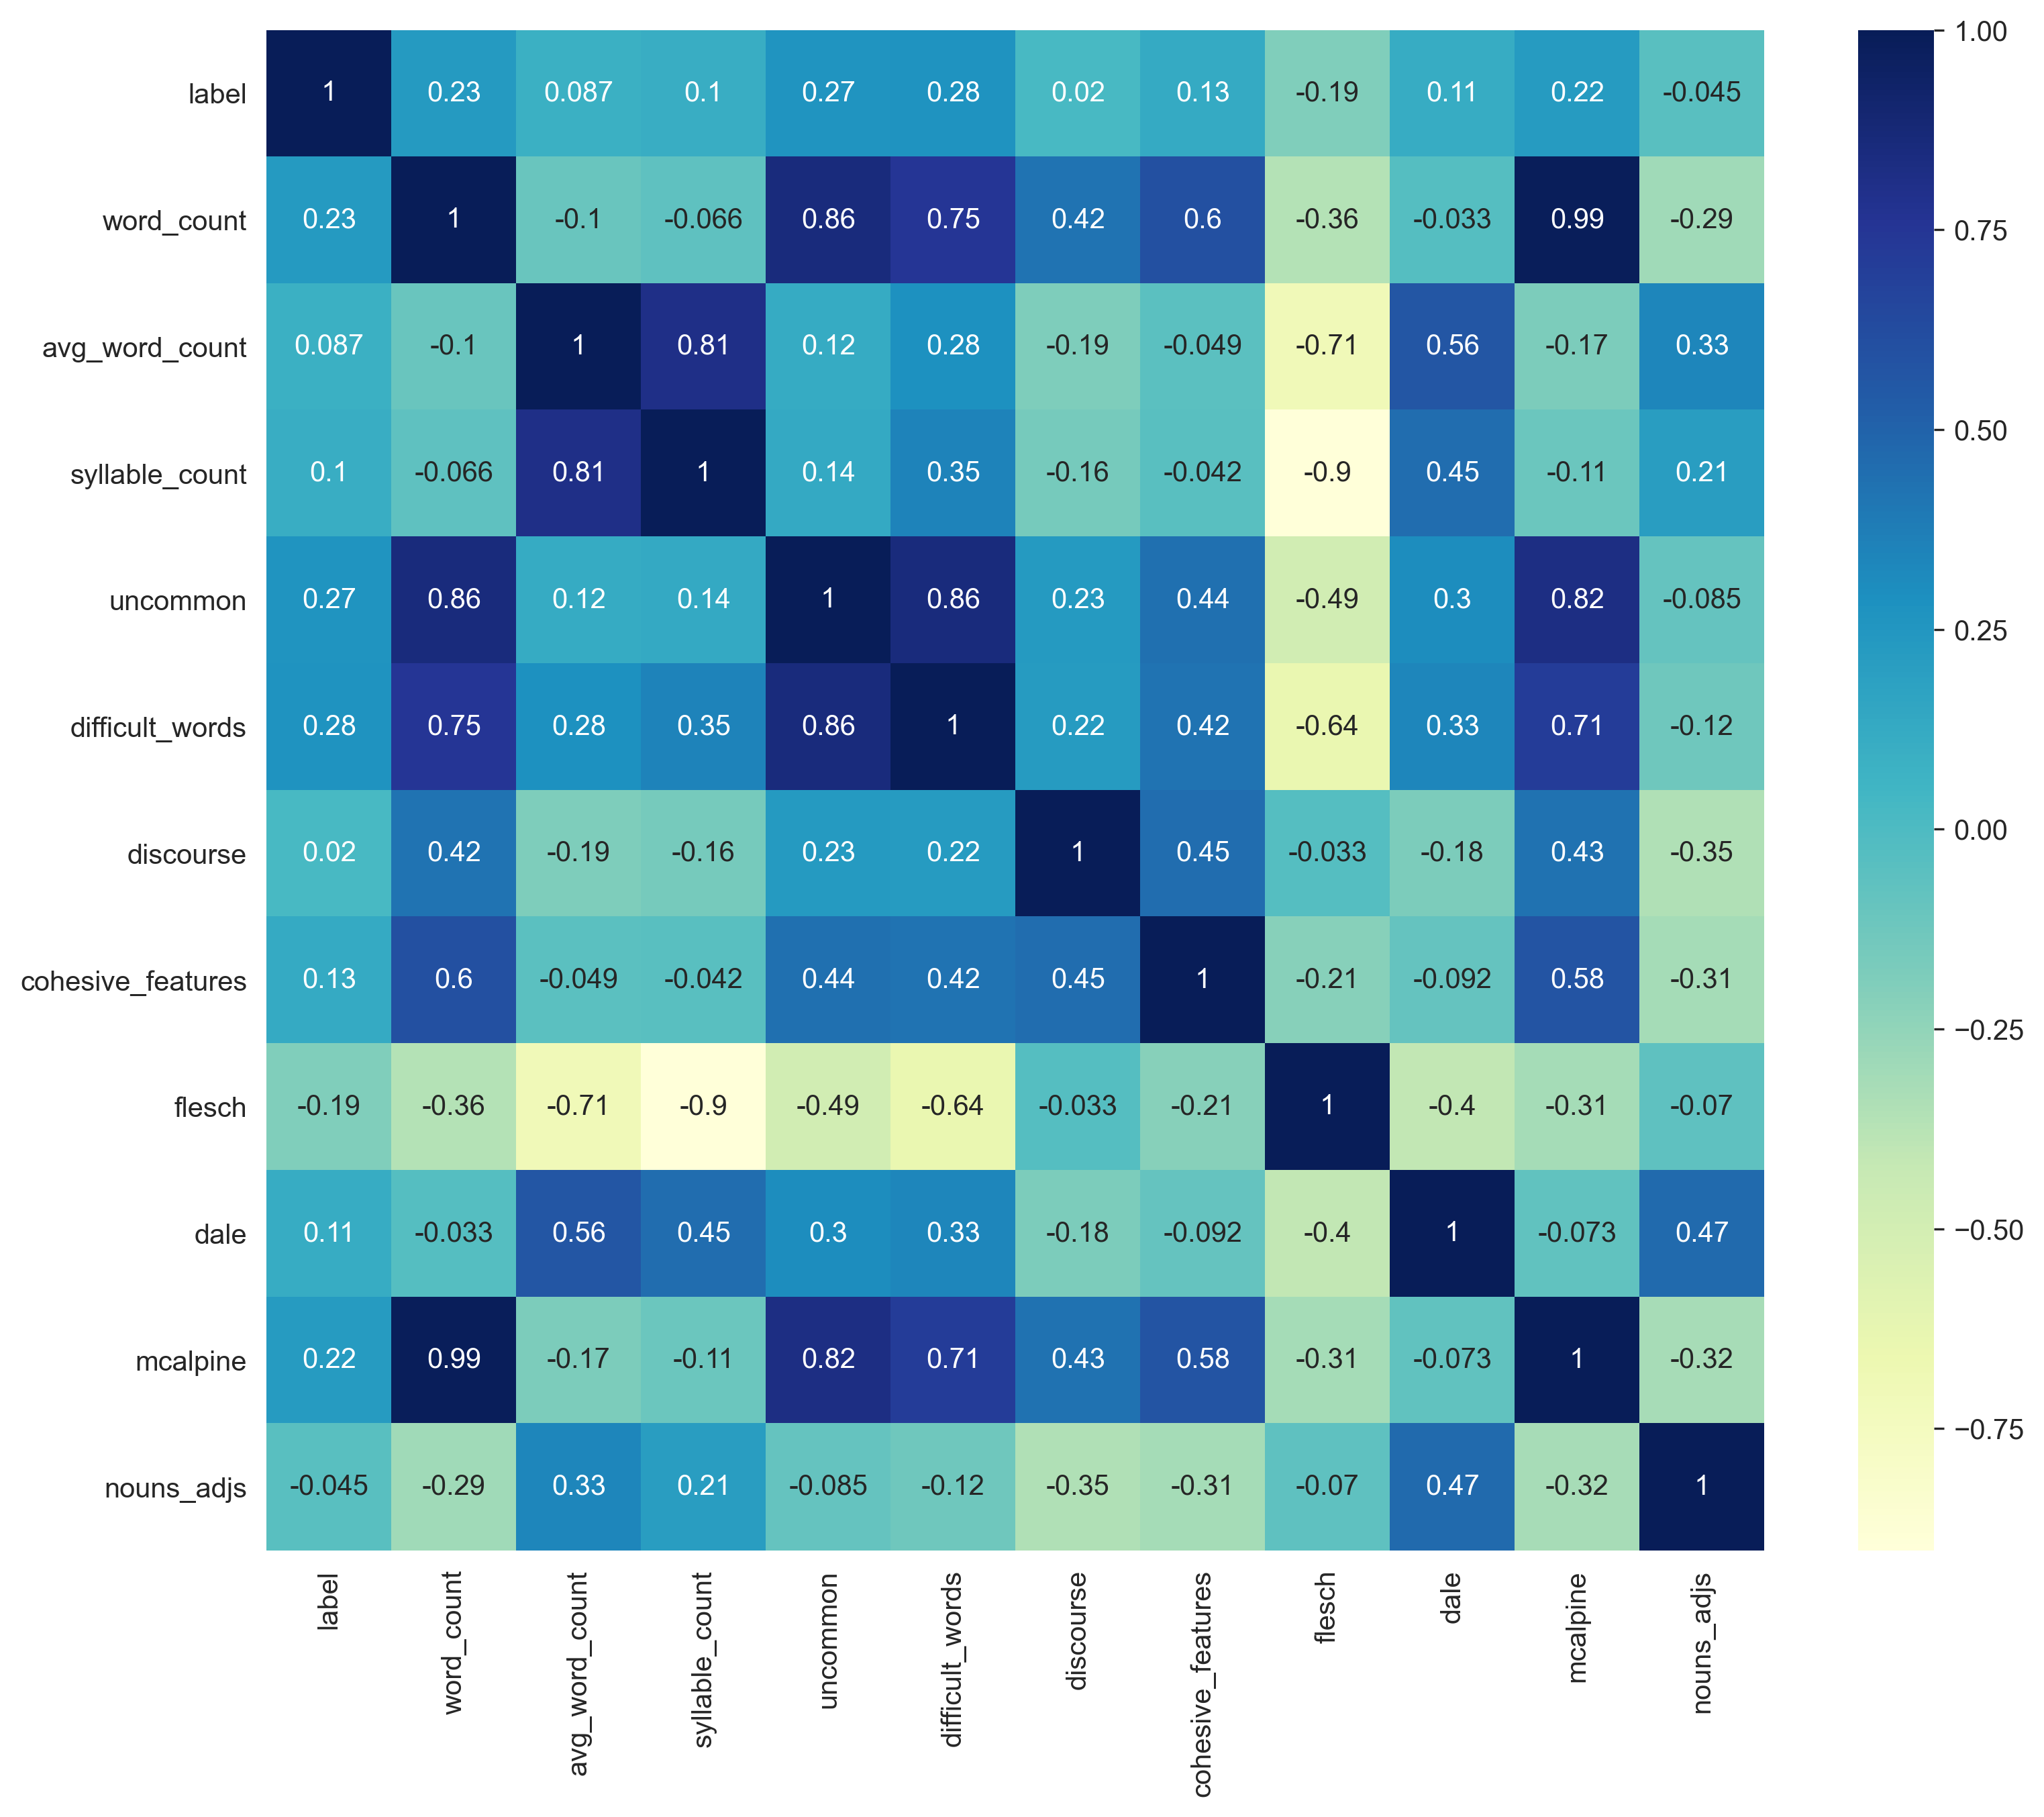

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")